According to UCI Machine Learning Repository - Behavior of the urban traffic of the city of Sao Paulo in Brazil Dataset,

Information:
* All data is Integar Real
* Attribute Hour {7:00, 7:30, 8:00, 8:30, 9:00, 9:30, 10:00, 10:30, 11:00, 11:30, 12:00, 12:30, 13:00, 13:30, 14:00, 14:30, 15:00, 15:30, 16:00, 16:30, 17:00, 17:30, 18:00, 18:30, 19:00, 19:30, 20:00}
* Variables/Columns = Features = 18

Key Points:
* Scatter graph - Plot for numeric data
* Bar chart - Plot for categorical Vs numeric data or when unique value is less
* Line chart - Plot for time Vs Any data
* Histogram - Plot for continuous data (means when we have frequency table) or when unique values are more

----

In [63]:
url = "https://archive.ics.uci.edu/static/public/483/behavior+of+the+urban+traffic+of+the+city+of+sao+paulo+in+brazil.zip"

In [64]:
import requests                       #Import Live Data From Url
response = requests.get(url)
response.status_code

200

In [65]:
with open("city.zip", "wb") as f:       #Open file
    f.write(response.content)

In [66]:
import zipfile                           #Convert Live data into Zip File
with zipfile.ZipFile("city.zip") as zipped:
    zipped.extractall("brazilcity")

In [67]:
import pandas as pd                      # Read file using pandas
traffic = pd.read_csv(r"C:\Users\heros\Documents\CS\PGD\Data Visualization\Day-05 (Urban Traffic Dataset)\brazilcity\Behavior of the urban traffic of the city of Sao Paulo in Brazil\Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv", sep=";")

In [68]:
traffic.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"


### Applying some methods and attributes to get info about data

In [69]:
traffic.info()

# Note: It tells that there is no null value in data, and there are 17 integar column while 1 column is an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Hour (Coded)                           135 non-null    int64 
 1   Immobilized bus                        135 non-null    int64 
 2   Broken Truck                           135 non-null    int64 
 3   Vehicle excess                         135 non-null    int64 
 4   Accident victim                        135 non-null    int64 
 5   Running over                           135 non-null    int64 
 6   Fire vehicles                          135 non-null    int64 
 7   Occurrence involving freight           135 non-null    int64 
 8   Incident involving dangerous freight   135 non-null    int64 
 9   Lack of electricity                    135 non-null    int64 
 10  Fire                                   135 non-null    int64 
 11  Point of flooding  

In [70]:
#traffic.isnull() #give answer = False (because there is no null value in the data)

In [71]:
traffic.isnull().sum(axis = 0)   #bydefault axis = 0    #Method 1

# traffic.isnull().sum(axis = "index")                  #Method 2 (both gives same answer)

#Note: There is no null value so all results came zero

Hour (Coded)                             0
Immobilized bus                          0
Broken Truck                             0
Vehicle excess                           0
Accident victim                          0
Running over                             0
Fire vehicles                            0
Occurrence involving freight             0
Incident involving dangerous freight     0
Lack of electricity                      0
Fire                                     0
Point of flooding                        0
Manifestations                           0
Defect in the network of trolleybuses    0
Tree on the road                         0
Semaphore off                            0
Intermittent Semaphore                   0
Slowness in traffic (%)                  0
dtype: int64

In [72]:
traffic.index   #tells about rows

RangeIndex(start=0, stop=135, step=1)

In [73]:
traffic.columns   #tells about columns

Index(['Hour (Coded)', 'Immobilized bus', 'Broken Truck', 'Vehicle excess',
       'Accident victim', 'Running over', 'Fire vehicles',
       'Occurrence involving freight', 'Incident involving dangerous freight',
       'Lack of electricity', 'Fire', 'Point of flooding', 'Manifestations',
       'Defect in the network of trolleybuses', 'Tree on the road',
       'Semaphore off', 'Intermittent Semaphore', 'Slowness in traffic (%)'],
      dtype='object')

---

In [74]:
"Waqas".replace("W", "w")   #extra concept

'waqas'

---

### Extract Data of Slowness in traffic (%)

In [75]:
traffic["Slowness in traffic (%)"]

0       4,1
1       6,6
2       8,7
3       9,2
4      11,1
       ... 
130    17,8
131    18,1
132    17,7
133    17,4
134    12,1
Name: Slowness in traffic (%), Length: 135, dtype: object

In [76]:
traffic["Slowness in traffic (%)"] = traffic["Slowness in traffic (%)"].str.replace(",",".").astype(float)    #convert traffic % data into float(i.e. integar)

In [77]:
traffic.dtypes   #to check types of all data

Hour (Coded)                               int64
Immobilized bus                            int64
Broken Truck                               int64
Vehicle excess                             int64
Accident victim                            int64
Running over                               int64
Fire vehicles                              int64
Occurrence involving freight               int64
Incident involving dangerous freight       int64
Lack of electricity                        int64
Fire                                       int64
Point of flooding                          int64
Manifestations                             int64
Defect in the network of trolleybuses      int64
Tree on the road                           int64
Semaphore off                              int64
Intermittent Semaphore                     int64
Slowness in traffic (%)                  float64
dtype: object

In [78]:
traffic["Slowness in traffic (%)"].describe()

count    135.000000
mean      10.051852
std        4.363243
min        3.400000
25%        7.400000
50%        9.000000
75%       11.850000
max       23.400000
Name: Slowness in traffic (%), dtype: float64

In [79]:
traffic["Slowness in traffic (%)"].value_counts()

Slowness in traffic (%)
10.3    4
8.3     4
7.7     4
12.1    4
7.4     4
       ..
13.9    1
15.0    1
17.1    1
19.6    1
17.7    1
Name: count, Length: 83, dtype: int64

---

* In Categorical data, when we have less number of unique values - Go for Frequency table 
* In Categorical data, when we have more number of unique values - Go for Cumulative Frequency table (means continuous data)

In [85]:
import matplotlib.pyplot as plt

### Histogram for Slowness in traffric - As it is categorical data

In [81]:
traffic["Slowness in traffic (%)"].value_counts(bins=10).sort_index()  #first convert data into frequency table 

(3.379, 5.4]    16
(5.4, 7.4]      21
(7.4, 9.4]      36
(9.4, 11.4]     27
(11.4, 13.4]    11
(13.4, 15.4]     6
(15.4, 17.4]     6
(17.4, 19.4]     5
(19.4, 21.4]     3
(21.4, 23.4]     4
Name: count, dtype: int64

## Histogram

#### Histogram using pandas

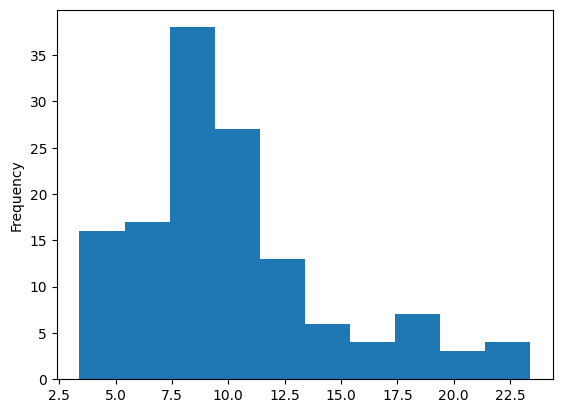

In [86]:
 traffic["Slowness in traffic (%)"].plot.hist()
plt.show()   #It is Right Skewed Graph

#### Histogram using matplotlib

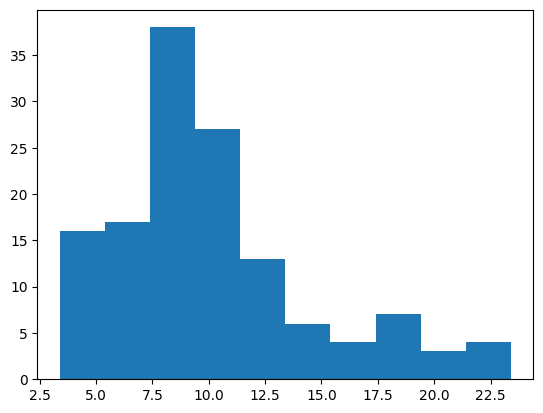

In [87]:
import matplotlib.pyplot as plt
plt.hist(traffic["Slowness in traffic (%)"])
plt.show()

---

### Extract Incidents from overall data - So drop Hour and Slowness % column

In [89]:
incidents = traffic.drop(['Hour (Coded)','Slowness in traffic (%)'], axis = "columns").copy()
incidents

,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
131,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
132,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
133,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [93]:
incidents.sum()   #individual sum of all incidents

Immobilized bus                           46
Broken Truck                             118
Vehicle excess                             4
Accident victim                           57
Running over                              16
Fire vehicles                              1
Occurrence involving freight               1
Incident involving dangerous freight       1
Lack of electricity                       16
Fire                                       1
Point of flooding                         16
Manifestations                             7
Defect in the network of trolleybuses     31
Tree on the road                           6
Semaphore off                             17
Intermittent Semaphore                     2
dtype: int64

In [92]:
incidents.sum().sum()    #total sum of all incidents

340

## Bar Plot

### Bar Plot of all incidents using pandas

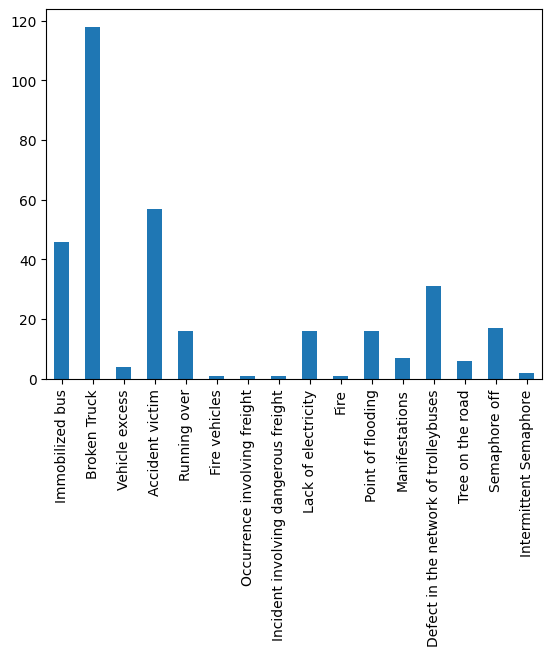

In [94]:
incidents.sum().plot.bar()
plt.show()

To convert above graph into better format - Horizontal Format

Result: So according to bar plot it seems like slowness in traffic in mostly affected due to broken trucks, then Immobilized buses and so on. But is it actually true. To check it we have to go for correlation.

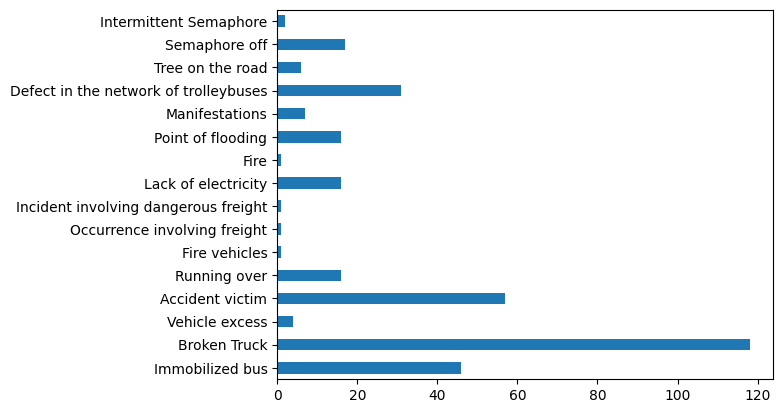

In [96]:
incidents.sum().plot.barh()
plt.show()

---

### Absoulte Corelation of Slowness with all incidents (dropping Hour)

In [101]:
traffic.corr()['Slowness in traffic (%)'].drop("Hour (Coded)")

# traffic.corr()['Slowness in traffic (%)'].drop("Hour (Coded)").abs() 
# if we use absolute - then it will convert all values into positive value

Immobilized bus                          0.101143
Broken Truck                             0.131998
Vehicle excess                          -0.045297
Accident victim                          0.121730
Running over                            -0.001133
Fire vehicles                            0.134103
Occurrence involving freight             0.026791
Incident involving dangerous freight     0.000957
Lack of electricity                      0.436569
Fire                                    -0.046737
Point of flooding                        0.420016
Manifestations                           0.066377
Defect in the network of trolleybuses   -0.147035
Tree on the road                        -0.098489
Semaphore off                            0.347242
Intermittent Semaphore                  -0.119942
Slowness in traffic (%)                  1.000000
Name: Slowness in traffic (%), dtype: float64

Below is the corealtion of Slowness with all incidents, except hour and slowness itself so we drop it using drop method. Plus in sort values ascending order is false means result came in descening order.

So the corelation shows that the actual reason of slowness is Lack of electricity, Point of flooding and Semaphore off. Not the Broken Truck and Immobilized busses

In [98]:
traffic.corr()['Slowness in traffic (%)'].drop(["Hour (Coded)", "Slowness in traffic (%)"]).sort_values(ascending = False)

Lack of electricity                      0.436569
Point of flooding                        0.420016
Semaphore off                            0.347242
Fire vehicles                            0.134103
Broken Truck                             0.131998
Accident victim                          0.121730
Immobilized bus                          0.101143
Manifestations                           0.066377
Occurrence involving freight             0.026791
Incident involving dangerous freight     0.000957
Running over                            -0.001133
Vehicle excess                          -0.045297
Fire                                    -0.046737
Tree on the road                        -0.098489
Intermittent Semaphore                  -0.119942
Defect in the network of trolleybuses   -0.147035
Name: Slowness in traffic (%), dtype: float64

## Scatter Graph - For Corelation

### Graph between Slowness and Lack of electricity

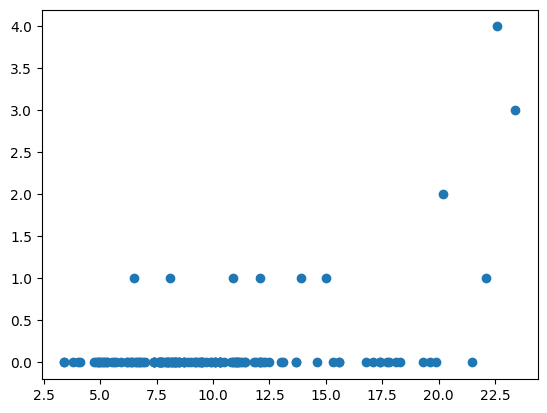

In [103]:
plt.scatter(traffic["Slowness in traffic (%)"], traffic["Lack of electricity"])
plt.show()

# Graph shows positive corelation - as it increases
#Note: It shows that the lack of electricity is high only for few days but due to thsi it cause a major effect in 
# slowness in traffic

### Graph between Slowness and Point of Flooding

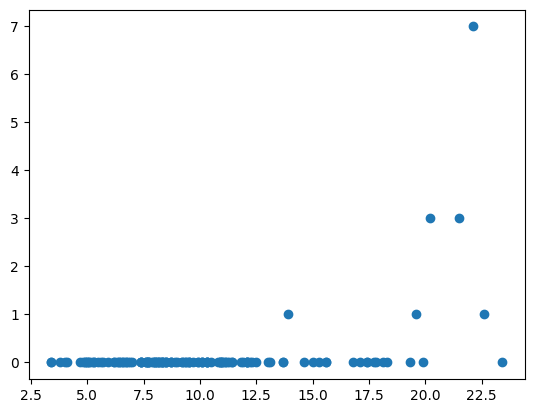

In [106]:
plt.scatter(traffic["Slowness in traffic (%)"], traffic["Point of flooding"])
plt.show()

# Graph shows positive corelation - as it increases
#Note: It shows that the point of flooding is high only for few days but due to thsi it cause a major effect in 
# slowness in traffic

### Graph between Slowness and Semaphore off

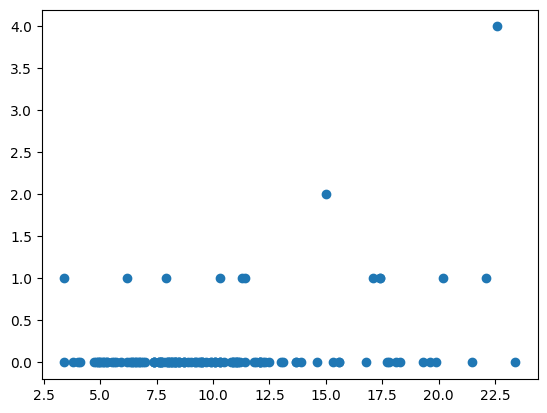

In [108]:
plt.scatter(traffic["Slowness in traffic (%)"], traffic["Semaphore off"])
plt.show()

# Graph shows positive corelation - as it increases
#Note: It shows that the semaphore off is high only for few days but due to thsi it cause a major effect in 
# slowness in traffic